In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
from stldecompose import decompose

In [68]:
nottem = pd.read_excel("anomaly_dataset.xlsx")

In [69]:
type(nottem)

pandas.core.frame.DataFrame

In [70]:
nottem.head()


,Unnamed: 0,datetime,server,cpu
0,0,2018-01-01 00:00:00,GRVV8601,48.062518
1,1,2018-01-01 01:00:00,GSTV9970,76.629052
2,2,2018-01-01 02:00:00,SHOV9400,49.230476
3,3,2018-01-01 03:00:00,aplv1600,62.706124
4,4,2018-01-01 04:00:00,SAPB6XV,60.091487


In [71]:
nottem.timestamp = pd.to_datetime(nottem.datetime)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [72]:
nottem = nottem.sort_values(by="datetime")

In [73]:
nottem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5089 entries, 0 to 5088
Data columns (total 4 columns):
Unnamed: 0    5089 non-null int64
datetime      5089 non-null datetime64[ns]
server        5089 non-null object
cpu           5089 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 198.8+ KB


In [74]:
nottem.set_index("datetime", inplace =True)

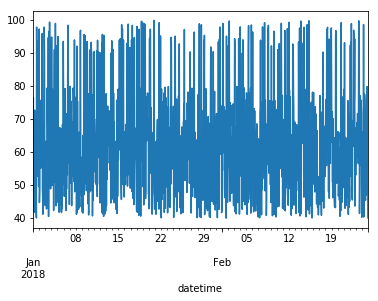

In [75]:
nottem.cpu["2018-01-01":"2018-02-24"].plot()

In [79]:
stl = decompose(nottem, period=12)
stl.trend.head()

ValueError: could not convert string to float: 'GRVV8601'

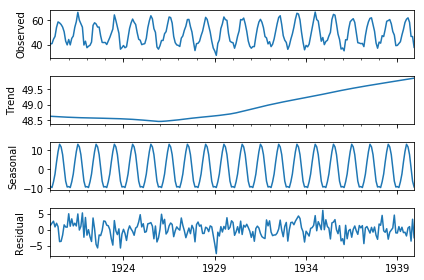

In [77]:
stlvisual = stl.plot()

In [ ]:
stl.resid["1922-01-31":"1923-12-31"].plot()

In [12]:
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

In [13]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [14]:
nottem.count()

Temp    240
dtype: int64

In [17]:
# STL decomposition of nottem
stl = decompose(nottemts, period=24)
stl.trend.head()

1920-01-31    48.616042
1920-02-29    48.612980
1920-03-31    48.609917
1920-04-30    48.606960
1920-05-31    48.604002
Freq: M, dtype: float64

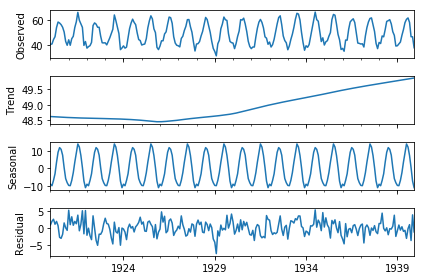

In [18]:
stlvisual = stl.plot()

In [19]:
#nottemts_without_trend= nottemts-stl.trend

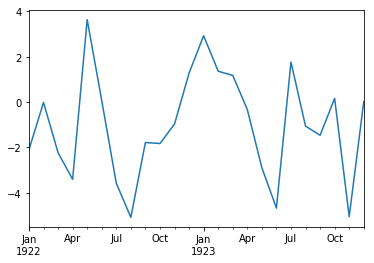

In [20]:
stl.resid["1922-01-31":"1923-12-31"].plot()

In [21]:
stl.resid.std()

2.1447271162917483

In [142]:
q1, q3= np.percentile(stl.resid,[25,75])
print("q1 : ",q1,"q3 : ",q3)

q1 :  -1.2173378018766359 q3 :  1.330288019967406


In [143]:
iqr = q3 - q1
print("IQR : ",iqr)

IQR :  2.5476258218440417


In [144]:
lower_bound = q1 -(1.5 * iqr) 

In [145]:
lower_bound

-5.0387765346426985

In [146]:
upper_bound = q3 +(1.5 * iqr)

In [147]:
upper_bound 

5.1517267527334685

In [148]:
stl.resid[stl.resid>upper_bound].count()

2

In [149]:
stl.resid[stl.resid<lower_bound].count()

3

In [150]:
Outliers=stl.resid[(stl.resid>upper_bound) | (stl.resid<lower_bound)]

In [151]:
Outliers

1921-10-31    5.195930
1922-08-31   -5.727057
1923-11-30   -5.751308
1929-02-28   -7.508000
1934-12-31    5.996489
dtype: float64

In [152]:
#stl.resid.drop(stl.resid[stl.resid>upper_bound].index, inplace=True)

In [153]:
#stl.resid.drop(stl.resid[stl.resid<lower_bound].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


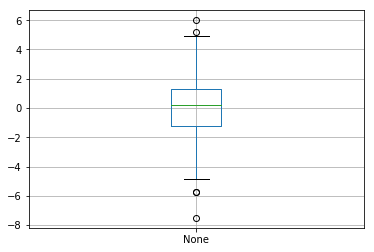

In [154]:
stl.resid.plot.box(grid='True')

In [155]:
stl.resid


1920-01-31    1.299617
1920-02-29    2.012830
1920-03-31    2.616043
1920-04-30    0.829385
1920-05-31    1.967727
1920-06-30    0.895898
1920-07-31   -3.755932
1920-08-31   -3.668114
1920-09-30   -1.720297
1920-10-31    1.472285
1920-11-30    0.794867
1920-12-31    0.752585
1921-01-31    4.932064
1921-02-28    1.044369
1921-03-31    3.346675
1921-04-30    1.159055
1921-05-31    1.996434
1921-06-30    1.123604
1921-07-31    4.870774
1921-08-31   -0.142430
1921-09-30    1.004366
1921-10-31    5.195930
1921-11-30   -2.382506
1921-12-31    3.774228
1922-01-31   -1.747277
1922-02-28   -0.035883
1922-03-31   -2.234490
1922-04-30   -3.722915
1922-05-31    3.613660
1922-06-30    0.240160
                ...   
1937-07-31   -1.095428
1937-08-31    0.681407
1937-09-30   -0.781758
1937-10-31    0.800086
1937-11-30   -1.788070
1937-12-31   -3.040850
1938-01-31    1.728130
1938-02-28    1.330168
1938-03-31    4.422206
1938-04-30   -0.375466
1938-05-31   -0.848137
1938-06-30    0.269188
1938-07-31 

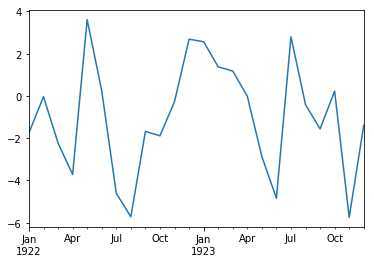

In [156]:
stl.resid["1922-01-31":"1923-12-31"].plot(use_index=True)


In [157]:
len(stl.resid.index)

240

In [158]:
Outliers

1921-10-31    5.195930
1922-08-31   -5.727057
1923-11-30   -5.751308
1929-02-28   -7.508000
1934-12-31    5.996489
dtype: float64

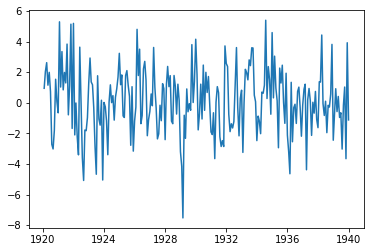

In [22]:
plt.plot(stl.resid)

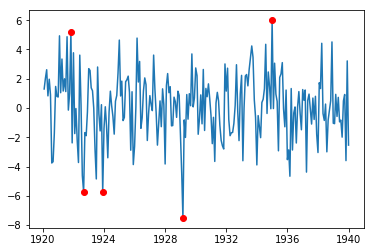

In [159]:
plt.plot(stl.resid)
plt.plot(Outliers,'ro')